In [1]:
import Bio
from Bio import PDB

In [2]:
# import itertools
import sys
# from IPython.html.widgets.widget_float import FloatProgress
# import matplotlib as mpl
import pymol
from pymol import cmd, stored
# import matplotlib
# from matplotlib import cm

In [ ]:
pymol.pymol_argv = ['pymol', '-qc'] # quiet / no GUI
stdout = sys.stdout
stderr = sys.stderr
pymol.finish_launching(['pymol', '-xiq'])
sys.stdout = stdout
sys.stderr = stderr

In [ ]:
%run 'ks08_Epistasis_in_all_backgrounds.ipynb'
notebook_prefix = 'ks09'
image_counter = Counter()
session_counter = Counter()

#### Summary of epistatic interactions

In [1]:
epdict__segment_pos1_pos2 = get_empty_segment_position1_position2_defaultdict(ep_dict)
epdict__segment_pos1_pos2 = fill_dictionary_with_values(epdict__segment_pos1_pos2, ep_dict)
filtered_dict = filter_segment_position1_position2_dict(epdict__segment_pos1_pos2, 'fraction_strong')

NameError: name 'get_empty_segment_position1_position2_defaultdict' is not defined

In [ ]:
%run 'functions_dump.py'

strong_ep_positions = []
for segment in filtered_dict:
    for position in filtered_dict[segment]:
        average_fraction = np.max(filtered_dict[segment][position][1])
        if average_fraction > 0.1:
            strong_ep_positions.append(int(position))
# print strong_ep_positions    
# plot_better()
# plt.hist(fractions_strong, edgecolor='none', bins=80, range=(0,0.2));

lucas_pBon001=[7, 8, 9, 11, 13, 16, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 38, 41, 56, 60, 62, 76, 77, 78, 79, 80, 81, 82, 85, 96, 97, 98, 99, 102, 104, 105, 106, 108, 110, 111, 112, 114, 115, 117, 119, 120, 121, 122, 131, 135, 137, 139, 140, 141, 142, 143, 144, 145, 147, 148, 151, 152, 154, 157, 160, 161, 163, 164, 165, 168, 169, 170, 172, 175, 177, 181, 189, 202, 203, 206, 207, 208, 209]
res_6A  = [35, 37, 38, 39, 61, 65, 68, 71, 72, 124, 125, 184, 186, 187, 190, 194]
res_8A = [35, 36, 37, 38, 39, 40, 41, 61, 64, 65, 67, 68, 71, 72, 123, 124, 125, 126, 184, 186, 187, 188, 190, 191, 194]
res_12A = [ 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 51, 53, 55, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 121, 122, 123, 124, 125, 126, 127, 128, 129, 147, 152, 153, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 201]
res_4A = [37, 39, 71, 72, 124, 186, 190, 194]
interface_residues = [29, 30, 31, 32, 35, 36, 38, 39, 41, 60, 61, 64, 71, 72, 89, 90, 91, 94, 98, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 132, 133, 134, 138, 139, 140, 142, 144, 148, 149, 150, 151, 153, 154, 156, 158, 159, 162, 165, 169, 174, 176, 178, 180, 181, 183, 184, 185, 186, 187, 190, 194, 198, 201, 202]


spacing = 2
upper_ylim = 250
xmin=0.85
xmax=0.9
text_spacing = 2

plot_better(width=18, height=3, grid='x')
ax = plt.subplot(111)

plot_segment_positions(ax, positions, segment_colors, scale=3)

order = 1
plt.plot(lucas_pBon001, np.ones_like(lucas_pBon001)-spacing*order, marker='o', color='green', markeredgecolor='none', ls='none')
plt.axhline(1-spacing*order, xmin=xmin, xmax=xmax, color='gray', ls='--')
plt.text(xmax*upper_ylim+text_spacing, 1-spacing*order, 'Sign epistasis', va='center', fontsize=12)

order += 1
plt.plot(strong_ep_positions, np.ones_like(strong_ep_positions)-spacing*order, 'or', markeredgecolor='none')
plt.axhline(1-spacing*order, xmin=xmin, xmax=xmax, color='gray', ls='--')
plt.text(xmax*upper_ylim+text_spacing, 1-spacing*order, 'Frequent strong epistasis', va='center', fontsize=12)

order += 1
plt.plot(res_6A, np.ones_like(res_6A)-spacing*order, 'om', markeredgecolor='none')
plt.axhline(1-spacing*order, xmin=xmin, xmax=xmax, color='gray', ls='--')
plt.text(xmax*upper_ylim+text_spacing, 1-spacing*order, '6A from substrate', va='center', fontsize=12)

order += 1
plt.plot(res_12A, np.ones_like(res_12A)-spacing*order, 'om', markeredgecolor='none')
plt.axhline(1-spacing*order, xmin=xmin, xmax=xmax, color='gray', ls='--')
plt.text(xmax*upper_ylim+text_spacing, 1-spacing*order, '12A from substrate', va='center', fontsize=12)

order += 1
plt.plot(interface_residues, np.ones_like(interface_residues)-spacing*order, 'ob', markeredgecolor='none')
plt.axhline(1-spacing*order, xmin=xmin, xmax=xmax, color='gray', ls='--')
plt.text(xmax*upper_ylim+text_spacing, 1-spacing*order, 'Interface residues', va='center', fontsize=12)

plt.ylim([spacing * -1 * order, spacing*4])
plt.xlim(0,upper_ylim)

plt.yticks([])
plt.xticks(np.arange(0,220, 10))
ax.spines["left"].set_visible(False)   
plt.xlabel('Sequence positions',fontsize=12)

plt.tight_layout()

plt.savefig('/Users/karen/Downloads/positions_under_sign_epistasis__vs__distance_to_ligand.pdf')

### PyMol visualizations

In [ ]:
pdb_file = 'files_dump/structure_visualizations/HIS3_saccharomyces_cerevisiae__itasser_model1_prediction__aligned_with_4LOM.pse'

for segment in data:
    for position in ep_std_by_position[segment]:
        
        other_positions, values = filtered_dict[segment][position]
        max_value = 0.3 # to color everything in the same scale
        values = values[:]
        values.extend([0, max_value])
        values = [min([max_value, v]) for v in values]

        title = 'Epistasis between position %s in segment %s and other positions' %(position, segment)
        folder_to_save = check_dir(os.path.join(pymol_sessions_folder, 
                                                'epistasis_between_pairs_of_positions'+'__'+what_to_look_at, segment.split('_')[0]))
        cmd.reinitialize()
        open_or_fetch(pdb_file)
        color_positions(other_positions, values=values, representation='spheres', colormap=mpl.cm.Blues)
        cmd.color('red', 'resi %s' %position)
        cmd.show('spheres', 'resi %s' %position)
        cmd.hide('everything', '4LOM')
        cmd.color('orange', 'ligand')
        cmd.show('spheres', 'ligand')
        save_session_properly(session_counter, title, folder_to_save, notebook_prefix)

### Heatmap of epistasis

In [ ]:
pdb_file = "files_dump/structure_predictions/HIS3_saccharomyces_cerevisiae__itasser_model1_prediction.pdb" 
structure = Bio.PDB.PDBParser().get_structure('His3_itasser', pdb_file)
model = structure[0]

In [ ]:
residues = list(model.get_residues())

In [ ]:
def calc_residue_dist(residue_one, residue_two):
    """Returns the C-alpha distance between two residues"""
    diff_vector  = residue_one["CA"].coord - residue_two["CA"].coord
    return np.sqrt(np.sum(diff_vector * diff_vector))

NameError: name 'epistasis_by_positions' is not defined

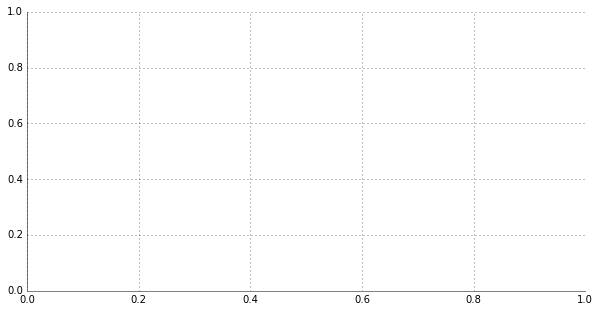

In [43]:
to_correlate = {}
ep_matrix = np.zeros((230, 230), np.float)
dist_matrix = np.zeros((230, 230), np.float)
plot_better()
for segment in epistasis_by_positions:
    for position1 in epistasis_by_positions[segment]:
        for position2 in epistasis_by_positions[segment][position1]:
            distance_value = calc_residue_dist(residues[int(position1)-1], residues[int(position2)-1])
            epistasis_value = np.max(epistasis_by_positions[segment][position1][position2]['fraction_strong'])
            dist_matrix[position1, position2] = distance_value
            ep_matrix[position1, position2] = epistasis_value
            to_correlate[tuple(sorted((position1, position2)))] = distance_value, epistasis_value
            plt.scatter(distance_value, epistasis_value, edgecolor='none', color=segment_colors[segment.split('_')[0]], alpha=0.5)
            title = 'Epistasis between pairs of positions'
            y_label = 'Epistasis between pairs of positions\n(fraction of genotypes under epistasis >%s in all backgrounds)' %ep_threshold
            plt.ylabel(y_label)
            plt.xlabel('Distance between positions')
            plt.title(title)

In [ ]:
plot_better(width=16, height=8)

ax = plt.subplot(121)
im = plt.imshow(ep_matrix, cmap=matplotlib.cm.BuPu, origin='lower', vmax=0.3)
cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
cbar.ax.set_ylabel('Fraction of strong epistatic interactions', rotation=270)

plt.xlim(0,230)
plt.ylim(-30,230)
plt.xlabel('Position')
plt.ylabel('Position')
title = 'Epistasis between pairs of positions'
title += '\n(fraction of genotypes under epistasis >%s in all backgrounds)' %ep_threshold
plt.title(title)
improve_plot(ax)


ax = plt.subplot(122)
im = plt.imshow(dist_matrix, cmap=matplotlib.cm.BuPu, origin='lower', vmax=25)
cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
cbar.ax.set_ylabel('Distance, A', rotation=270)

#plotting the segments
old_y = -20
for row in positions.iterrows():
    for position in row[1].positions_Uniprot_P06633:
        new_y = np.random.choice([-10,-20])
        while new_y == old_y:
            new_y = np.random.choice([-10,-20])
    x = row[1].positions_Uniprot_P06633
    plt.plot(x, [new_y for e in x], '.', lw=3, alpha=0.7, label=row[1].segment, color=segment_colors[row[1].segment])
    plt.text(np.median(x), new_y + 2, row[1].segment)
    old_y = new_y
plt.xlim(0,230)
plt.ylim(-30,230)
plt.xlabel('Position')
plt.ylabel('Position')
plt.title('Distance between pairs of positions')
improve_plot(ax)


plt.tight_layout()

In [ ]:
directory = os.path.join(files_dump_folder, 'impacts_of_mutations_in_all_backgrounds__full_lib', '')
fitness_impacts = OrderedDict()
list_of_files = [f for f in os.listdir(directory) if '.hdf' in f]
for f in list_of_files:
    mut = f.rstrip('.hdf').split('_')[-1]
    fitness_impacts[mut] = pd.read_hdf(directory + f, 'data')

In [ ]:
dot_color = '#E91348'
plot_better(width=14, height=9)
title ='Fraction of strong epistasis vs distance between positions  in all backgrounds'
for index, segment in enumerate(data.keys()):
    to_correlate = []
    ax = plt.subplot(3,4,index+1)
    for position1 in epistasis_by_positions[segment]:
        for position2 in epistasis_by_positions[segment][position1]:
            distance_value = calc_residue_dist(residues[int(position1)-1], residues[int(position2)-1])
            for value in epistasis_by_positions[segment][position1][position2]['fraction_strong']:
                to_correlate.append((distance_value, value))
                plt.scatter(distance_value, value, color='blue', edgecolor='none', alpha=0.1)
    subtitle = 'Epistasis vs distance in %s' % segment.split('_')[0]
    subtitle += '\n spearman coeff = %.2f' %stats.spearmanr(to_correlate)[0]
    plt.title(subtitle)
    plt.xlim(0,43)
    plt.ylim(0,0.7)
    plt.xlabel('Distance between positions, A')
    plt.ylabel('Fraction of strong epistasis\nbetween pairs of mutations')
    improve_plot(ax)
plt.tight_layout()
save_image(image_counter, title, figures_folder, notebook_prefix)

In [ ]:
dot_color = '#E91348'
plot_better(width=14, height=9)
title ='Fraction of strong epistasis vs fitness of interacting mutations  in all backgrounds'
for index, segment in enumerate(data.keys()):
    to_correlate = []
    ax = plt.subplot(3,4,index+1)
    improve_plot(ax)
    for mutA, mutB in ep_dict[segment]:
        ep = ep_dict[segment][mutA, mutB]
        ep_fraction = 1. * len(ep[np.abs(ep) > ep_threshold]) / len(ep)
        fitness_value = fitness_impacts[mutA].mean() + fitness_impacts[mutB].mean()
#         fitness_value = np.abs(fitness_impacts[mutA].mean()) + np.abs(fitness_impacts[mutB].mean())
        plt.scatter(fitness_value, ep_fraction, color=dot_color, edgecolor='none', alpha=0.1)    
        to_correlate.append((fitness_value, ep_fraction))
    subtitle = 'Epistasis vs fitness in %s' % segment.split('_')[0]
    subtitle += '\n spearman coeff = %.2f' %stats.spearmanr(to_correlate)[0]
    plt.title(subtitle)
    plt.ylim(0,0.7)
    plt.xlim(-0.7, 0.1)
    plt.axvline(0, color='gray')
    plt.xlabel('Sum of av. fitness impacts\nof interacting mutations')
    plt.ylabel('Fraction of strong epistasis\nbetween pairs of mutations')

plt.tight_layout()
save_image(image_counter, title, figures_folder, notebook_prefix)

### Sign epistasis from Lucas

In [8]:
% run 'functions_dump.py'

In [32]:
position_translation = pd.read_table(files_dump_folder + 'position_translation.csv')
position_translation.set_index('relative_position', inplace=True)
position_translation

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12
relative_position,,,,,,,,,,,,
0,106.0,136.0,145.0,171.0,181,96.0,66.0,56.0,36.0,30.0,13.0,6.0
1,107.0,137.0,146.0,172.0,182,97.0,67.0,57.0,37.0,31.0,14.0,7.0
2,108.0,138.0,147.0,173.0,183,98.0,68.0,58.0,38.0,32.0,15.0,8.0
3,109.0,139.0,148.0,174.0,184,99.0,69.0,59.0,39.0,33.0,16.0,9.0
4,110.0,140.0,149.0,175.0,185,100.0,70.0,60.0,40.0,34.0,17.0,10.0
5,111.0,141.0,150.0,176.0,186,101.0,71.0,61.0,41.0,35.0,18.0,11.0
6,112.0,142.0,151.0,177.0,187,102.0,72.0,62.0,42.0,36.0,19.0,12.0
7,113.0,143.0,152.0,178.0,188,103.0,73.0,63.0,43.0,37.0,20.0,13.0
8,114.0,144.0,153.0,179.0,189,104.0,74.0,64.0,44.0,38.0,21.0,14.0


In [33]:
def get_absolute_position(segment_number, relative_position):
    return int(position_translation.iloc[relative_position]['S'+str(segment_number)])

lucas_sign_epistasis = pd.read_excel('/Users/karen/Downloads/SignEpiPairs.xlsx')
lucas_sign_epistasis['VarPos_absolute'] = lucas_sign_epistasis.apply(lambda df: get_absolute_position(df['SegN'], df['VarPos']-1), axis=1)
lucas_sign_epistasis['SubPos_absolute'] = lucas_sign_epistasis.apply(lambda df: get_absolute_position(df['SegN'], df['SubPos']-1), axis=1)
# lucas_sign_epistasis['distance'] = lucas_sign_epistasis.apply(lambda df: calc_residue_dist(residues[df['VarPos_absolute']-1], residues[df['SubPos_absolute']-1]), axis=1)

In [34]:
logodds_threshold = 5
lucas_sign_epistasis['logodds_thresholded'] = lucas_sign_epistasis['logodds'].apply(lambda f: min(f, logodds_threshold))

In [ ]:
plot_better()
plt.scatter(lucas_sign_epistasis['distance'], lucas_sign_epistasis['logodds_thresholded'], edgecolor='none', alpha=0.1)
correlation = stats.spearman]r(lucas_sign_epistasis['distance'], lucas_sign_epistasis['logodds_thresholded'])
plt.xlabel('Distance, A')
plt.ylabel('logodds from Lucas')
plt.title('Spearman correlation: %.3f' %correlation[0])

In [13]:
# pdb_file = "files_dump/structure_predictions/HIS3_saccharomyces_cerevisiae__swissmodel_prediction.pdb" 
pdb_file = "files_dump/structure_visualizations/His3_aligned_with_4LOM_assembly_by_Sasha.pdb" 
# structure = Bio.PDB.PDBParser().get_structure('His3_itasser', pdb_file)
# chain = list(structure[0].get_chains())[0]

In [35]:
subset = lucas_sign_epistasis[lucas_sign_epistasis.pBon < 0.05]
var_positions = set(subset.VarPos_absolute.values)

In [39]:
cols = ['VarPos_absolute', 'SubPos_absolute', 'Perm', 'SubPerm']
pos121 = lucas_sign_epistasis[lucas_sign_epistasis.VarPos_absolute == 121][cols]

{96, 97, 98, 99, 102, 104, 105, 117, 119, 120, 122}

In [44]:
assembly_file = '/Users/karen/Downloads/swiss_assembly.pse'

In [47]:
cmd.reinitialize()
open_or_fetch(assembly_file)
white_and_beautiful()
cmd.color('red', 'resi 121')
cmd.show('spheres', 'resi 121')
color_positions(set(pos121.SubPos_absolute.values), representation='spheres')
save_session('/Users/karen/Downloads/position121.pse')

 Applying pse_export_version=1.720 compatibility


In [147]:
cmd.reinitialize()
open_or_fetch(assembly_file)
white_and_beautiful()
# cmd.color('red', 'resi 121')
# cmd.show('spheres', 'resi 121')
color_positions(range(85,95), representation='spheres')
save_session('/Users/karen/Downloads/position85-95.pse')

 Applying pse_export_version=1.720 compatibility


In [159]:
a = [[1,2],[3,4]]
[item for sublist in a for item in sublist]

[1, 2, 3, 4]

In [207]:
cmd.reinitialize()
open_or_fetch(assembly_file)
white_and_beautiful()
interface_residues = [29, 30, 31, 32, 35, 36, 38, 39, 41, 60, 61, 64, 71, 72, 89, 90, 91, 94, 98, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 132, 133, 134, 138, 139, 140, 142, 144, 148, 149, 150, 151, 153, 154, 156, 158, 159, 162, 165, 169, 174, 176, 178, 180, 181, 183, 184, 185, 186, 187, 190, 194, 198, 201, 202]
color_positions(interface_residues, representation='spheres')
save_session('/Users/karen/Downloads/interface_residues.pse')

 Applying pse_export_version=1.720 compatibility
